In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [ ]:
# Study hours vs marks
data = {
    "study_hours": [1,2,3,4,5,6,7,8,9,10],
    "marks": [35,40,45,50,55,65,70,80,85,90]
}

df = pd.DataFrame(data)




In [ ]:
# Pass / Fail
df["pass"] = df["marks"].apply(lambda x: 1 if x >= 50 else 0)

X = df[["study_hours"]]
y_reg = df["marks"]
y_clf = df["pass"]

In [ ]:
lr = LinearRegression()
lr.fit(X, y_reg)

pred_marks = lr.predict(X)


In [ ]:
# ---- Custom Input ----
hours = float(input("Enter study hours: "))

predicted_marks = lr.predict([[hours]])
print(f"Predicted Marks: {predicted_marks[0]:.2f}")


Enter study hours: 4
Predicted Marks: 51.91


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
log_reg = LogisticRegression()

params = {
    "C": [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(log_reg, params, cv=3)
grid.fit(X, y_clf)

best_model = grid.best_estimator_


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


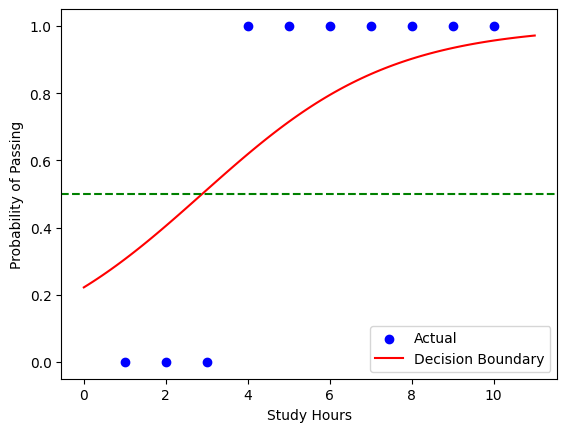

In [ ]:
x_vals = np.linspace(0, 11, 100).reshape(-1, 1)
y_probs = best_model.predict_proba(x_vals)[:,1]

plt.scatter(X, y_clf, color="blue", label="Actual")
plt.plot(x_vals, y_probs, color="red", label="Decision Boundary")
plt.axhline(0.5, color="green", linestyle="--")

plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.legend()
plt.show()


In [ ]:
y_pred = best_model.predict(X)
print("Accuracy:", accuracy_score(y_clf, y_pred))
print("Best C:", grid.best_params_)


Accuracy: 0.9
Best C: {'C': 0.1}


In [ ]:
# ---- Custom Input ----
hours = float(input("Enter study hours: "))

prediction = best_model.predict([[hours]])
probability = best_model.predict_proba([[hours]])[0][1]

if prediction[0] == 1:
    print(f"Status: PASS  (Probability: {probability:.2f})")
else:
    print(f"Status: FAIL  (Probability: {probability:.2f})")


Enter study hours: 6
Status: PASS  (Probability: 0.79)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Spam Email Classifier

In [ ]:
import pandas as pd
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [ ]:
data = {
    "text": [
        "Win money now",
        "Limited offer click now",
        "Meeting at 10 am",
        "Project discussion tomorrow",
        "Free coupons available",
        "Let's catch up later"
    ],
    "label": ["spam","spam","ham","ham","spam","ham"]
}

df = pd.DataFrame(data)


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z ]", "", text)
    return text



In [ ]:
df["clean_text"] = df["text"].apply(clean_text)


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_text"])
y = df["label"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.00      0.00      0.00       0.0
        spam       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
# ---- Custom Email Input ----
user_email = input("Enter email text: ")

# Clean the input
cleaned_email = clean_text(user_email)

# Vectorize
email_vector = vectorizer.transform([cleaned_email])

# Predict
prediction = model.predict(email_vector)[0]
prob = model.predict_proba(email_vector).max()

print(f"Prediction: {prediction.upper()}")
print(f"Confidence: {prob:.2f}")


Enter email text: Win money now
Prediction: HAM
Confidence: 0.69
